<a href="https://colab.research.google.com/github/penguin1109/Machine-Learning-via-Tensorflow2.0/blob/master/Data_Analysis_Proj1_(Kaggle_CoronaVirusDataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d "kimjihoo/coronavirusdataset"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


**Google Colab에 우리가 분석하고자 하는 데이터를 올리기 위해서 **


```
from google.colab import files
files.upload()
```
를 하게 되면 우리가 올리고자하는 파일을 선택후 upload하여 분석과 학습이 가능하다.


In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"penguin1109","key":"b36d63ab89994b0c58d2bbc256bc4989"}'}

In [ ]:
files.upload()

Saving Case.csv to Case.csv


{'Case.csv': b" case_id,province,city,group,infection_case,confirmed,latitude,longitude\r\n1000001,Seoul,Yongsan-gu,TRUE,Itaewon Clubs,139,37.538621,126.992652\r\n1000002,Seoul,Gwanak-gu,TRUE,Richway,119,37.48208,126.901384\r\n1000003,Seoul,Guro-gu,TRUE,Guro-gu Call Center,95,37.508163,126.884387\r\n1000004,Seoul,Yangcheon-gu,TRUE,Yangcheon Table Tennis Club,43,37.546061,126.874209\r\n1000005,Seoul,Dobong-gu,TRUE,Day Care Center,43,37.679422,127.044374\r\n1000006,Seoul,Guro-gu,TRUE,Manmin Central Church,41,37.481059,126.894343\r\n1000007,Seoul,from other city,TRUE,SMR Newly Planted Churches Group,36,-,-\r\n1000008,Seoul,Dongdaemun-gu,TRUE,Dongan Church,17,37.592888,127.056766\r\n1000009,Seoul,from other city,TRUE,Coupang Logistics Center,25,-,-\r\n1000010,Seoul,Gwanak-gu,TRUE,Wangsung Church,30,37.481735,126.930121\r\n1000011,Seoul,Eunpyeong-gu,TRUE,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165\r\n1000012,Seoul,Seongdong-gu,TRUE,Seongdong-gu APT,13,37.55713,127.0403\r\n1000013,Seo

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d "kimjihoo/coronavirusdataset"

In [ ]:
'chmod 600 /root/.kaggle/kaggle.json'

In [ ]:
import pandas as pd
df = pd.read_csv("/content/Case.csv")
df

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374
...,...,...,...,...,...,...,...,...
169,6100012,Gyeongsangnam-do,-,False,etc,20,-,-
170,7000001,Jeju-do,-,False,overseas inflow,14,-,-
171,7000002,Jeju-do,-,False,contact with patient,0,-,-
172,7000003,Jeju-do,-,False,etc,4,-,-


이 데이터는 우리나라의 코로나 바이러스의 최근 동향을 나타내는 데이터인데, 여기서 보면 collumn이 그렇게 많지는 않다. 지역, 도시, 단체 감염 여부, 세부 장소, 감염 확진 인원, latitude, longtitude이다.

여기서 딥러닝 알고리즘을 이용해서 모델을 만드려고 할때에는 무언가 예측할 부분이 필요한데, '발생 인원수에 따른 발생 도시 예측'이나 '발생 인원수에 따른 집잔 감염 여부'를 우선 주제로 생각 중인데, 후자는 별로 의미가 없을것 같기도 하다. 이미 선형 회귀일것 같기 때문에.

따라서 선형 관계를 파악하기 위해서 시각화를 해보고자 한다.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
group_cat = df[['group']]
ordinal_encoder = OrdinalEncoder()
group_cat_encoded = ordinal_encoder.fit_transform(group_cat)
df['group'] = group_cat_encoded
province_cat_encoded = ordinal_encoder.fit_transform(df[['province']])
df['province'] = province_cat_encoded

어차피 dataframe은 dictionary의 형태이기 때문에 언제든지 key와 value의 값이 추가, 삭제, 변경 등이 모드 python의 사전형 자료를 다루는 것 처럼 가능하다.

데이터셋과 테스트셋을 sklearn의 함수를 이용해서 만들어보자

test_set의 크기는 전체의 20%이고 train_set의 크기는 전체의 80%가 되도록 만들었다.

cf.DataFrame을 다룰 때에는 pandas의 library를 이용해야 한다.

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 44)

In [ ]:
print(max(df['confirmed']))
df['group']

4511


0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
169    0.0
170    0.0
171    0.0
172    0.0
173    1.0
Name: group, Length: 174, dtype: float64

실제로 df['confirmed']의 최댓값을 살펴보니 4511이라는 값이었고, 왜 아래와 같이 산점도가 만들어졌는지 알 수 있었다. 그래서 선형관계를 어떻게 파악하면 좋을지 생각 중이다.

In [ ]:
df['province'].value_counts()

15.0    38
7.0     22
8.0     13
9.0     12
4.0     10
3.0     10
0.0     10
2.0      8
5.0      8
1.0      7
10.0     7
14.0     6
13.0     5
12.0     5
6.0      5
16.0     4
11.0     4
Name: province, dtype: int64

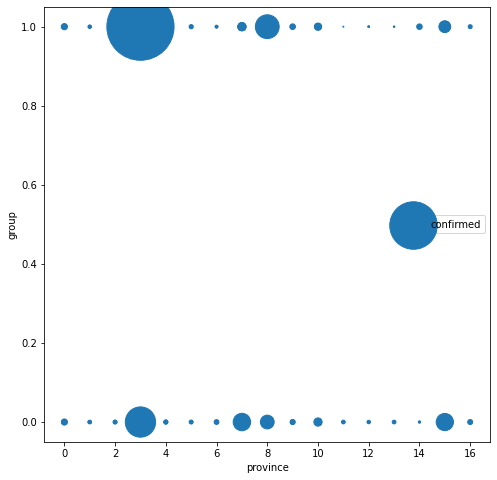

In [ ]:
import matplotlib.pyplot as plt
df.plot(kind = 'scatter',x ='province', y = 'group', s = df['confirmed'], label = 'confirmed',figsize = (8,8))
plt.legend()

In [ ]:
df.describe()
#밑에 모든 자료가 나오지 않는 이유는 숫자형 자료만 정보가 나오기 때문이다.

,case_id,province,group,confirmed
count,1.740000e+02,174.00000,174.000000,174.000000
mean,2.686216e+06,8.54023,0.712644,65.488506
std,1.943218e+06,5.01974,0.453835,355.097654
min,1.000001e+06,0.00000,0.000000,0.000000
25%,1.100006e+06,4.00000,0.000000,4.000000
50%,1.700004e+06,8.00000,1.000000,10.000000
75%,4.100004e+06,14.00000,1.000000,31.750000
max,7.000004e+06,16.00000,1.000000,4511.000000


df.info()를 보면 모든 정보가 174개의 non-null 값을 가지기 때문에 그 부분은 건드릴 필요가 없다. 다만 만약에 사용하려 한다면 city의 값이나 infection_case등을 수정해 주어야 하는 것은 맞다.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0    case_id        174 non-null    int64  
 1   province        174 non-null    float64
 2   city            174 non-null    object 
 3   group           174 non-null    float64
 4   infection_case  174 non-null    object 
 5   confirmed       174 non-null    int64  
 6   latitude        174 non-null    object 
 7   longitude       174 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 11.0+ KB


위에 데이터의 information에서 보면 알 수 있겠지만 자료형이 숫자형 자료int64와 float64이외에도 object라는 문자열 자료형이 존재하는데, 이를 sklearn.preprocessing의 OrdinalEncoder을 이용해서 바꾸거나 아니면 어차피 나중에 범위를 0~1로 줄이는 경우가 일반적이기 때문에 그렇게 OneHotEncoder을 이용해서 바꿔주어도 좋다.

In [ ]:
df['infection_case'].value_counts()

etc                                 17
overseas inflow                     17
contact with patient                16
Shincheonji Church                  15
Itaewon Clubs                        9
                                    ..
Orange Life                          1
Jin-gu Academy                       1
River of Grace Community Church      1
Ministry of Oceans and Fisheries     1
Guri Collective Infection            1
Name: infection_case, Length: 81, dtype: int64

먼저 어떤 주제로 데이터를 분석하고 신경망을 모델링 할 것인지 정해야 한다. 이번에는 나머지 정보들을 이용해서 'province'를 예측해보고 싶다. 우선 'infection_case'는 81개의 범주나 있기 때문에 이를 예측하는 것은 사실상 매우 어렵다. 따라서 'province'의 값을 나머지 자료들을 이용해 예측해보고자 한다.

그러기 위해서는 우선 object자료형으로 이루어진 데이터를 모두 float숫자형 자료로 바꾸어 주고 test_set과 train_set로 나누어주는 과정을 거쳐야 한다.